### **Smoking & Drinking DATASET**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# All Import statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data mining/smoking_driking_dataset_Ver01.csv')


df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

so there is no null value in the dataset

In [5]:
df.nunique()

sex                    2
age                   14
height                13
weight                24
waistline            737
sight_left            24
sight_right           24
hear_left              2
hear_right             2
SBP                  171
DBP                  127
BLDS                 498
tot_chole            474
HDL_chole            223
LDL_chole            432
triglyceride        1657
hemoglobin           190
urine_protein          6
serum_creatinine     183
SGOT_AST             568
SGOT_ALT             594
gamma_GTP            940
SMK_stat_type_cd       3
DRK_YN                 2
dtype: int64

In [6]:
df['SMK_stat_type_cd'] = df['SMK_stat_type_cd'].astype(int)
df.dtypes

sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left           float64
hear_right          float64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           float64
triglyceride        float64
hemoglobin          float64
urine_protein       float64
serum_creatinine    float64
SGOT_AST            float64
SGOT_ALT            float64
gamma_GTP           float64
SMK_stat_type_cd      int64
DRK_YN               object
dtype: object

In [7]:
new_df = pd.get_dummies(df, columns=['sex'])
new_df

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,sex_Female,sex_Male
0,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,...,17.1,1.0,1.0,21.0,35.0,40.0,1,Y,0,1
1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,...,15.8,1.0,0.9,20.0,36.0,27.0,3,N,0,1
2,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,...,15.8,1.0,0.9,47.0,32.0,68.0,1,N,0,1
3,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,...,17.6,1.0,1.1,29.0,34.0,18.0,1,N,0,1
4,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,...,13.8,1.0,0.8,19.0,12.0,25.0,1,N,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,80.0,...,15.0,1.0,1.0,26.0,36.0,27.0,1,N,0,1
991342,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,83.0,...,15.8,1.0,1.1,14.0,17.0,15.0,1,N,0,1
991343,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,70.0,...,14.3,1.0,0.8,30.0,27.0,17.0,3,Y,1,0
991344,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,74.0,...,14.5,1.0,0.8,21.0,14.0,17.0,1,N,0,1


In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
# Fit the encoder on the 'Category' column and transform it
new_df['DRK'] = label_encoder.fit_transform(new_df['DRK_YN'])
new_df


,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,sex_Female,sex_Male,DRK
0,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,...,1.0,1.0,21.0,35.0,40.0,1,Y,0,1,1
1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,...,1.0,0.9,20.0,36.0,27.0,3,N,0,1,0
2,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,...,1.0,0.9,47.0,32.0,68.0,1,N,0,1,0
3,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,...,1.0,1.1,29.0,34.0,18.0,1,N,0,1,0
4,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,...,1.0,0.8,19.0,12.0,25.0,1,N,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,80.0,...,1.0,1.0,26.0,36.0,27.0,1,N,0,1,0
991342,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,83.0,...,1.0,1.1,14.0,17.0,15.0,1,N,0,1,0
991343,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,70.0,...,1.0,0.8,30.0,27.0,17.0,3,Y,1,0,1
991344,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,74.0,...,1.0,0.8,21.0,14.0,17.0,1,N,0,1,0


In [9]:
# Drop some non-relatable column
new_df = new_df.drop(columns=['DRK_YN',"sight_left"	,"sight_right"	,"hear_left"	,"hear_right"])
new_df

,age,height,weight,waistline,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,...,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,sex_Female,sex_Male,DRK
0,35,170,75,90.0,120.0,80.0,99.0,193.0,48.0,126.0,...,17.1,1.0,1.0,21.0,35.0,40.0,1,0,1,1
1,30,180,80,89.0,130.0,82.0,106.0,228.0,55.0,148.0,...,15.8,1.0,0.9,20.0,36.0,27.0,3,0,1,0
2,40,165,75,91.0,120.0,70.0,98.0,136.0,41.0,74.0,...,15.8,1.0,0.9,47.0,32.0,68.0,1,0,1,0
3,50,175,80,91.0,145.0,87.0,95.0,201.0,76.0,104.0,...,17.6,1.0,1.1,29.0,34.0,18.0,1,0,1,0
4,50,165,60,80.0,138.0,82.0,101.0,199.0,61.0,117.0,...,13.8,1.0,0.8,19.0,12.0,25.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,45,175,80,92.1,114.0,80.0,88.0,198.0,46.0,125.0,...,15.0,1.0,1.0,26.0,36.0,27.0,1,0,1,0
991342,35,170,75,86.0,119.0,83.0,83.0,133.0,40.0,84.0,...,15.8,1.0,1.1,14.0,17.0,15.0,1,0,1,0
991343,40,155,50,68.0,110.0,70.0,90.0,205.0,96.0,77.0,...,14.3,1.0,0.8,30.0,27.0,17.0,3,1,0,1
991344,25,175,60,72.0,119.0,74.0,69.0,122.0,38.0,73.0,...,14.5,1.0,0.8,21.0,14.0,17.0,1,0,1,0


In [10]:
new_df.columns

Index(['age', 'height', 'weight', 'waistline', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'sex_Female', 'sex_Male', 'DRK'],
      dtype='object')

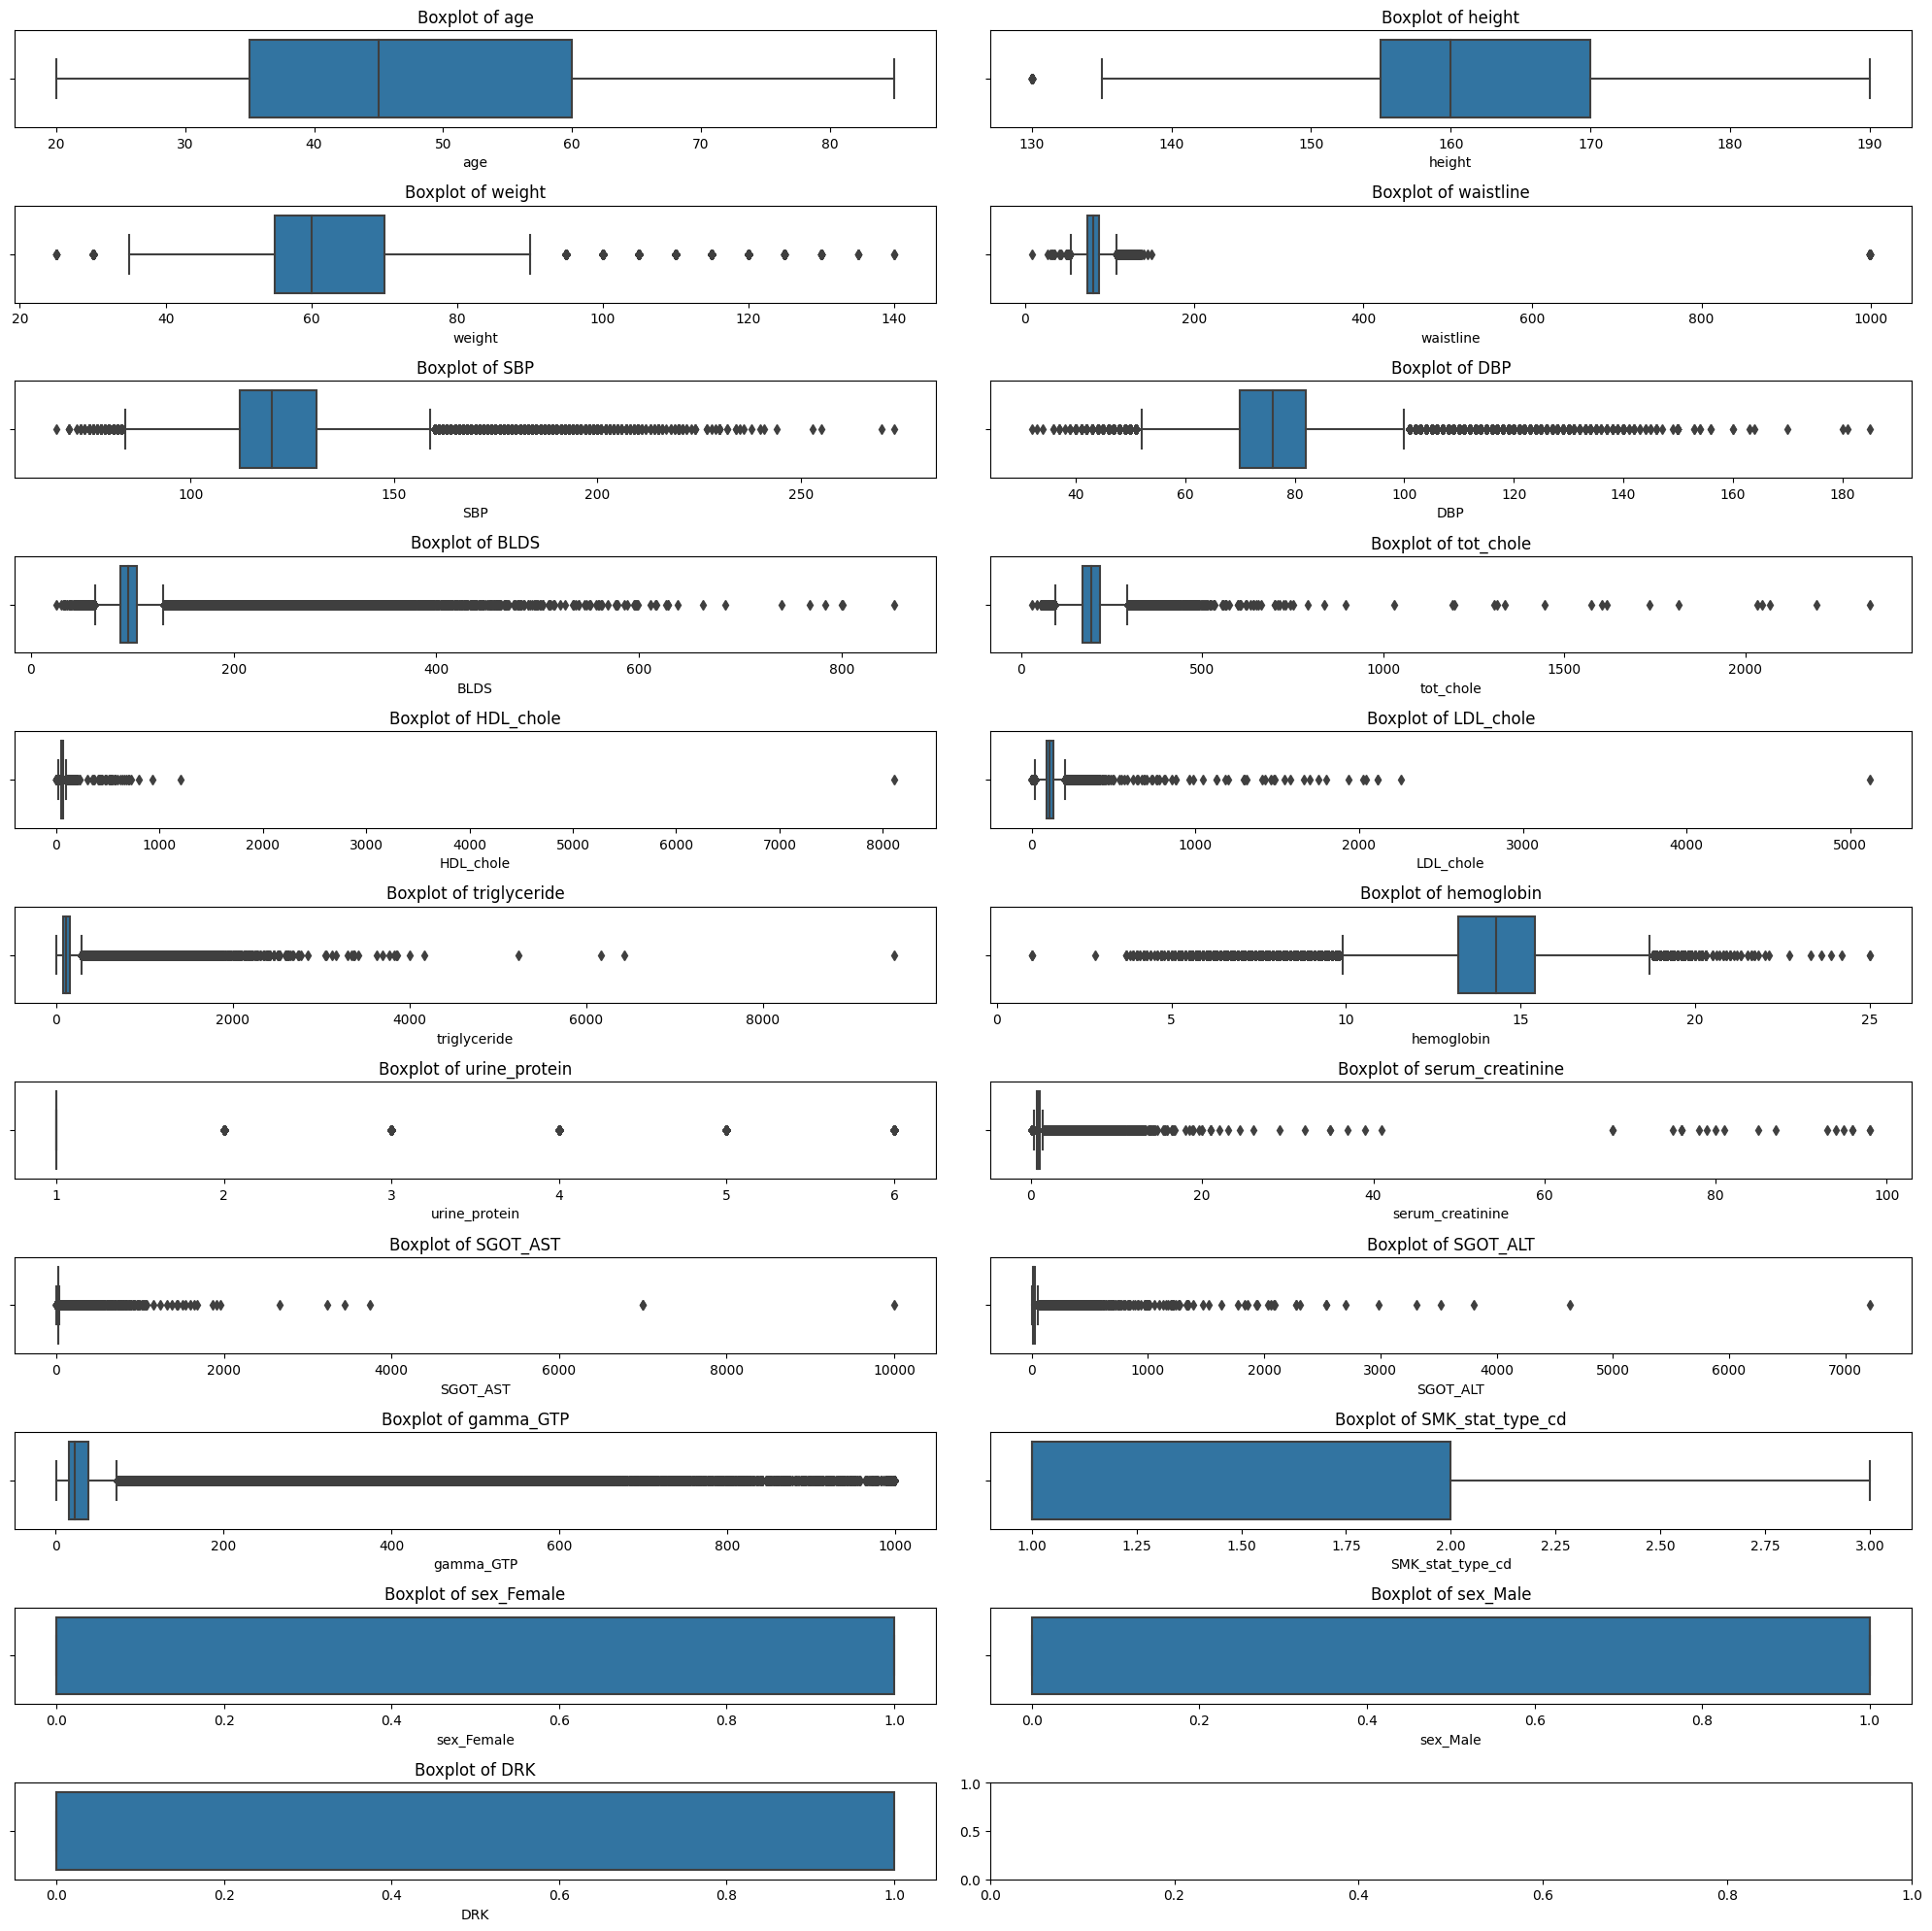

In [11]:
def plot_boxplots(dataframe):
    num_columns = dataframe.select_dtypes(include=['number']).columns
    num_plots = len(num_columns)
    rows = (num_plots + 1) // 2

    fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(20, 20))

    for i, column in enumerate(num_columns):
        row = i // 2
        col = i % 2
        ax = axes[row, col]
        sns.boxplot(x=dataframe[column], ax=ax)
        ax.set_title(f"Boxplot of {column}")
        ax.set_xlabel(column)

    plt.tight_layout()
    plt.show()

plot_boxplots(new_df)

In [12]:
new_df["SMK_stat_type_cd"].value_counts()

1    602441
3    213954
2    174951
Name: SMK_stat_type_cd, dtype: int64

In [13]:
cd = pd.crosstab(new_df["SMK_stat_type_cd"],new_df["age"])
cd

age,20,25,30,35,40,45,50,55,60,65,70,75,80,85
SMK_stat_type_cd,,,,,,,,,,,,,,
1,15334,42800,45880,41972,71678,66419,77475,68243,67810,35129,36036,19080,11780,2805
2,1228,5100,9863,14539,22094,22203,24512,23016,22670,11760,10464,4635,2467,400
3,5409,16470,21857,28215,36613,29733,27447,19964,15583,6072,4166,1618,721,86


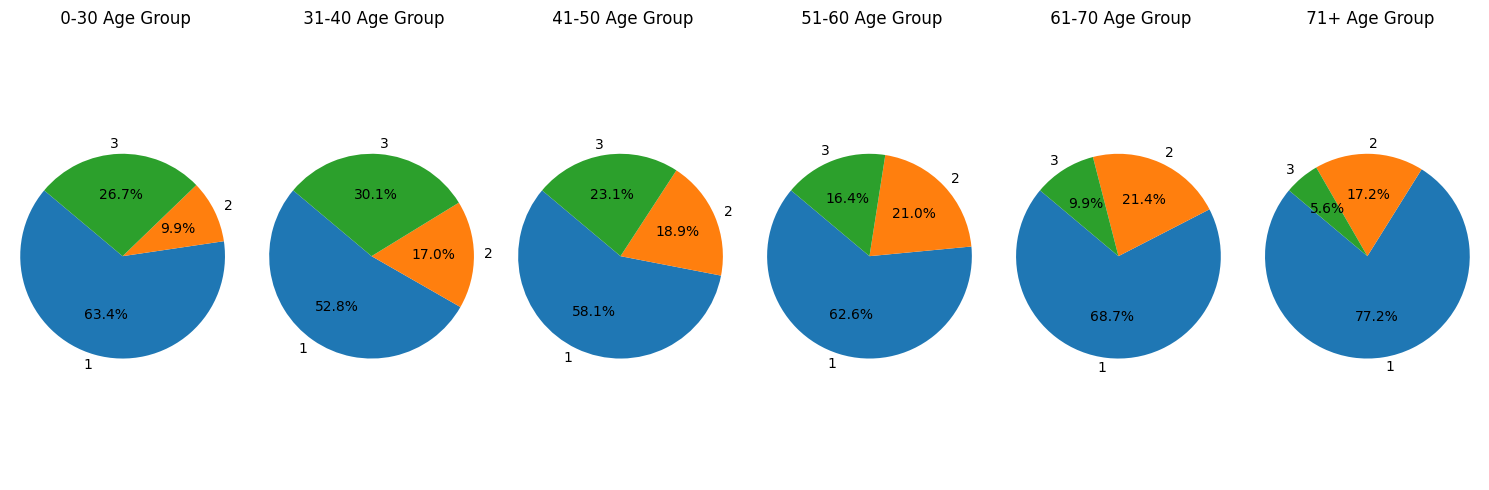

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Define age groups (you can adjust the age ranges as needed)
age_bins = [0, 30, 40, 50, 60,70, 100]  # Define age bins
age_labels = ['0-30', '31-40', '41-50', '51-60', '61-70',"71+"]  # Labels for age groups

# Create a new column 'Age_Group' based on the age bins
new_df['Age_Group'] = pd.cut(new_df['age'], bins=age_bins, labels=age_labels)

# Group the data by 'Age_Group' and 'SMK_stat_type_cd', and count occurrences
grouped_data = new_df.groupby(['Age_Group', 'SMK_stat_type_cd']).size().unstack(fill_value=0)

# Create a pie chart for each age group
fig, axes = plt.subplots(1, len(age_labels), figsize=(15, 5))

for i, age_group in enumerate(age_labels):
    ax = axes[i]
    data = grouped_data.loc[age_group]
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f' {age_group} Age Group')
    ax.axis('equal')

plt.tight_layout()
plt.show()


<ipython-input-15-e9887e132bd8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=new_df.corr()


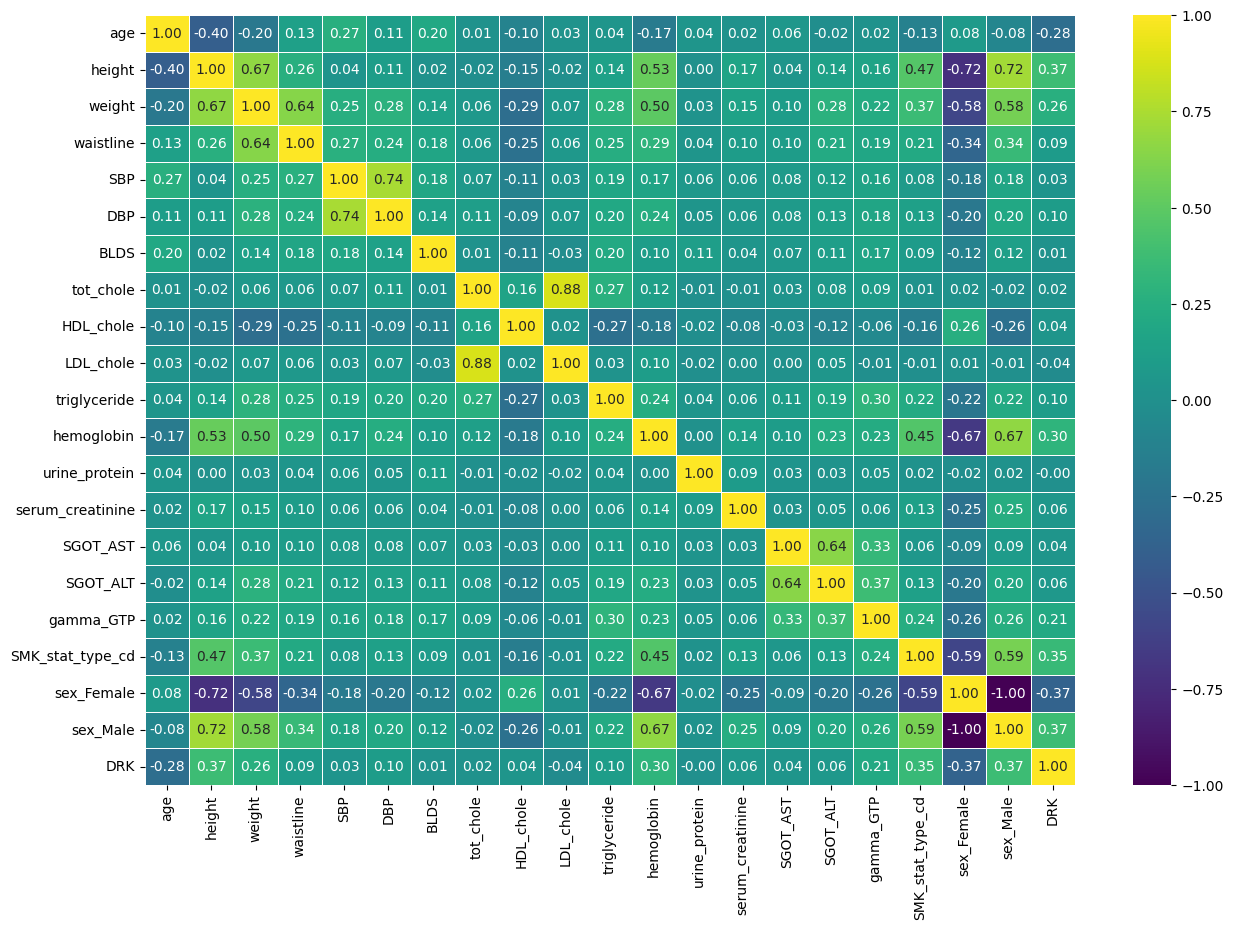

In [15]:
corr_matrix=new_df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="viridis")

In [45]:
correlation_threshold = 0.1
SMK_features = []
for feature in corr_matrix.columns:
    if feature != 'SMK_stat_type_cd' and (corr_matrix[feature]['SMK_stat_type_cd'] > correlation_threshold or
                                corr_matrix[feature]['SMK_stat_type_cd'] < -correlation_threshold):
        SMK_features.append(feature)

print("Correlated features with SMK_stat_type_cd:")
print(SMK_features)

Correlated features with SMK_stat_type_cd:
['age', 'height', 'weight', 'waistline', 'DBP', 'HDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_ALT', 'gamma_GTP', 'sex_Female', 'sex_Male', 'DRK']


In [22]:
x=new_df[SMK_features]
y=new_df["SMK_stat_type_cd"]


In [23]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(x)

In [24]:
#split into test and train
x_train,x_test,y_train,y_test= train_test_split(X_standardized,y,test_size=0.2)
x_train.shape,x_test.shape,y_test.shape,y_train.shape

((793076, 14), (198270, 14), (198270,), (793076,))

In [26]:
# Initialize and train a logistic regression model and SVC
logistic_model = LogisticRegression(max_iter=100, fit_intercept=False)  # Set fit_intercept=False
logistic_model.fit(x_train, y_train)

svc_model = svm.LinearSVC(max_iter=100)
svc_model.fit(x_train, y_train)

# Predict the target variable on the test set
y_pred_log = logistic_model.predict(x_test)
y_pred_svc = svc_model.predict(x_test)

# Calculate the accuracy of the models
accuracy_log = accuracy_score(y_test, y_pred_log)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print("Logistic Regression Accuracy:", accuracy_log)
print("SVM Accuracy:", accuracy_svc)

Logistic Regression Accuracy: 0.6726282342260553
SVM Accuracy: 0.6870731830332375


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [27]:
ran_frst=RandomForestClassifier()
ran_frst.fit(x_train,y_train)
y_pred=ran_frst.predict(x_test)
accuracy_ran=accuracy_score(y_test,y_pred)
accuracy_ran

0.697382357391436

In [28]:
# Grid Search CV on RandomForest
param_grid = {
    'n_estimators': [100, 200],                # Number of trees in the forest
    'max_depth': [None, 10],                   # Maximum depth of the tree
    'min_samples_split': [2, 5],               # Minimum number of samples required to split an internal node
}


#Logictic Regression
grid_sear=GridSearchCV(RandomForestClassifier(),
                     param_grid,
                     n_jobs=-1,
                      cv=2,
                    verbose=True)
grid_sear.fit(x_train,y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10], 'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             verbose=True)

In [34]:
best_params = grid_sear.best_params_
best_score = grid_sear.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.7011030468706656


In [30]:
y_pred = grid_sear.predict(x_test)

# Calculate the precision score
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')

print("Precision (Micro):", precision_micro)
print("Precision (Macro):", precision_macro)
print("Precision (Weighted):", precision_weighted)

Precision (Micro): 0.7004438392091592
Precision (Macro): 0.5965933301303498
Precision (Weighted): 0.6897691591115978


In [31]:
y_pred=grid_sear.predict(x_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
precision_macro = precision_score(y_test, y_pred, average='micro')
recall_macro = recall_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='micro')

print("Accuracy:", accuracy)
print("Precision (Macro):", precision_macro)
print("Recall (Macro):", recall_macro)
print("F1-score (Macro):", f1_macro)

Accuracy: 0.7004438392091592
Precision (Macro): 0.7004438392091592
Recall (Macro): 0.7004438392091592
F1-score (Macro): 0.7004438392091592


In [35]:
# Classification Report
from sklearn.metrics import classification_report
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

           1       0.82      0.85      0.84    120674
           2       0.46      0.30      0.36     34874
           3       0.51      0.60      0.55     42722

    accuracy                           0.70    198270
   macro avg       0.60      0.58      0.58    198270
weighted avg       0.69      0.70      0.69    198270



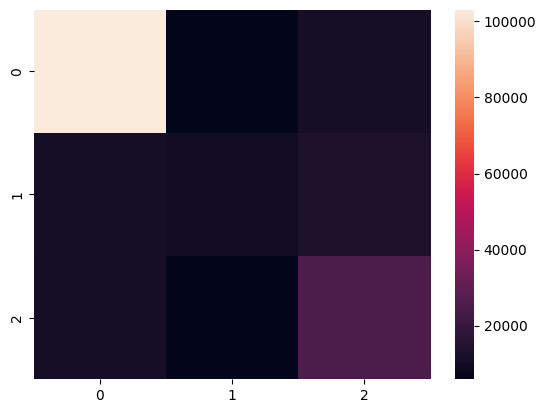

In [43]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cn=confusion_matrix(y_test,y_pred)
def plot_conf_mat(y_test,y_preds):
    fig, ax =plt.subplots()
    ax=sns.heatmap(confusion_matrix(y_test,y_pred),
                  annot=False,
                  cbar=True)

plot_conf_mat(y_test,y_pred)

In [46]:
classes = np.unique(y_test)
classes

array([1, 2, 3])

In [49]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# Create a base classifier (usually a decision tree)
base_classifier = DecisionTreeClassifier(max_depth=1)

# Create the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)
adaboost_classifier.fit(x_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [50]:
y_pred = adaboost_classifier.predict(x_test)


In [57]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:}')


Accuracy: 0.7058102587380845
